# PID控制热处理

Eärendil

2017/12/17

## 实验原理

**热处理**是利用热过程，包括加热、保温、冷却过程，改变材料的组织与性能，包括物理、化学和力学性能。其本质是利用材料在热过程中的相变规律，影响材料的组织性能，一般不改变材料的形状和整体化学成分（化学热处理除外）。

- 淬火：将钢加热到奥氏体区，得到奥氏体组织，然后快速冷却到马氏体区，获高硬度的马氏体组织。
- 回火：将材料加热到临界温度（共析温度）以下的适当温度，保持一段时间后在空气或水、油等介质中冷却的热处理工艺。根据处理温度及效果的不同，分为低温回火、中温回火和高温回火。回火后得到回火索氏体组织。其形貌为铁素体基体内分布着细小球状碳化物（包括渗碳体）的复相组织。
- 淬火+高温回火复合热处理工艺称为调质处理。 

## 实验数据分析

实验中采样频率设置较高，使得实验过程共产生了约$10^5$个数据点。而实际上实验系统为了滤除高频噪声，对信号进行了滤波处理。之后的数据处理全部基于滤波后的信号。

### 温度-时间关系分析

根据实验数据，分别画出热处理过程全图、刚进入恒温阶段的温度曲线、出现较大偏差的温度曲线。

In [1]:
%pylab inline
%xmode Plain
%config InlineBackend.figure_format="svg"
import pandas as pd
from scipy import signal as sig

Populating the interactive namespace from numpy and matplotlib
Exception reporting mode: Plain


In [2]:
data=array(pd.read_csv('F:/学习/材料数字化技术/PID控制热处理/炉温LTY_smoothed.csv')).T
start=data[0,0]
goal=500
heat_time=10*60
keep_time=60*60
data=data[:,data[0]<=heat_time+keep_time]
time=data[0]
temp=data[2]
expected=r_[time[time<heat_time]/heat_time*(goal-start)+start,ones(sum(time>=heat_time))*goal]

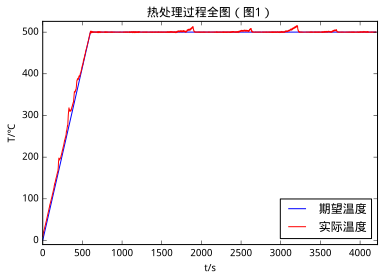

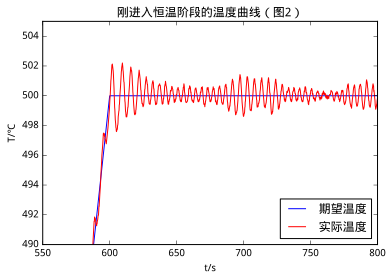

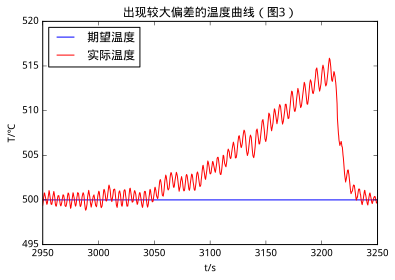

In [3]:
# 热处理过程全图
plot(time,expected,'b',label='期望温度')
plot(time,temp,'r',label='实际温度')
xlim(0,time.max()+20)
ylim(start-10,temp.max()+10)
xlabel('t/s')
ylabel('T/℃')
legend(loc='lower right')
title('热处理过程全图（图1）')

# 刚进入恒温阶段的温度曲线
figure()
plot(time,expected,'b',label='期望温度')
plot(time,temp,'r',label='实际温度')
xlim(heat_time-50,heat_time+200)
ylim(goal-10,goal+5)
xlabel('t/s')
ylabel('T/℃')
legend(loc='lower right')
title('刚进入恒温阶段的温度曲线（图2）')

# 出现较大偏差的温度曲线
figure()
plot(time,expected,'b',label='期望温度')
plot(time,temp,'r',label='实际温度')
xlim(2950,3250)
ylim(goal-5,goal+20)
xlabel('t/s')
ylabel('T/℃')
legend(loc='upper left')
title('出现较大偏差的温度曲线（图3）')

1. 从图1可以看出，实际温度响应迅速，与期望温度整体比较吻合，符合热处理工艺的要求。
2. 从图2可以看出，系统超调量小，约2℃（< 5%$T_{goal}$），调整时间短。但进入稳态后，实际温度始终做振幅约2℃，周期约5s的振荡，无法保持在期望温度。考虑到实验所用的PID控制参数是上一次实验中反复调试出的，问题可能来自于：
    - 加热、散热过程与系统温度有关，本次实验系统温度较上次试验有明显提高，使参数不能完全适用。
    - 之前调节PID控制参数时，过于强调减小调节时间，使$T_I$过小，在目标温度较高时，积分作用过度，引起系统不稳定，产生振荡。
    - 系统中加入试样后，由于试样的热容和热处理过程中相变吸热，系统的滞后性增强，使原有微分作用不足，起不到提前纠偏的作用。
    
   采用之前建立的模型也可以验证，保持原有参数，系统将维持稳态振荡；而分别将$T_I$和$T_D$略微调大至某一限度之后，随时间增长，振幅逐渐减小。

3. 从图1可以看出，实际温度多次出现较大偏差；从图3可以看出，偏差区域的普遍特征是：实际温度在振荡的同时，其均值先在略高于期望温度的水平上保持一段时间，而后直线上升，上升10~15℃后迅速回落到期望温度。按照PID控制理论，比例作用和积分作用的存在都会抑制这种情况的发生。对于这种现象，我目前没有合理的解释。
    